In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train_transaction.csv')

In [3]:
df_id = pd.read_csv('train_identity.csv')

In [4]:
df = pd.merge(df, df_id, how='left', on='TransactionID')

In [5]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [227]:
(df
 .assign(transaction_hr = np.floor(df['TransactionDT'].apply(lambda x: ((x/60/60/24) - np.floor(x/60/60/24))*24)))
 .groupby('transaction_hr')
 .isFraud
 .agg([np.mean, len])
)
         



,mean,len
transaction_hr,,
0.0,0.031375,37801
1.0,0.031349,32792
2.0,0.037447,26731
3.0,0.038308,20805
4.0,0.051897,14837
5.0,0.070309,9700
6.0,0.077743,6007
7.0,0.106102,3704
8.0,0.093014,2591


In [6]:
sketchy_devices = list(df.groupby('DeviceInfo').isFraud.agg([np.mean, len]).query('len>10').query('mean>.5').index)

In [7]:
sketchy_browser = list(df.groupby('id_31').isFraud.agg([np.mean, len]).query('len>10').query('mean>.15').index)

In [228]:
#Dealing with NA
df.fillna(0, inplace=True)
#Variable Creation
df['has_r'] = (pd.notna(df['R_emaildomain'])).astype(int)
df['different_r'] = (df['has_r']) * (df.P_emaildomain == df.R_emaildomain).astype(int)
df['is_discover'] = (df.card4=='discover').astype(int)
df['is_credit'] = (df.card6=='credit').astype(int)
df['is_sketchy_addr2'] = (df.addr2.isin([0,60,96]))
df['is_na_M1'] = (df['M1']==0).astype(int)
df['is_na_M2'] = (df['M2']==0).astype(int)
df['is_na_M3'] = (df['M3']==0).astype(int)
df['is_na_M5'] = (df['M5']==0).astype(int)
df['is_na_M6'] = (df['M6']==0).astype(int)
df['is_na_M7'] = (df['M7']==0).astype(int)
df['is_na_M8'] = (df['M8']==0).astype(int)
df['is_na_M9'] = (df['M9']==0).astype(int)
df['is_big_NA'] = df['is_na_M1']*df['is_na_M2']*df['is_na_M3']*df['is_na_M5']*df['is_na_M6']*df['is_na_M7']*df['is_na_M8']*df['is_na_M9']
df['is_C'] = (df.ProductCD=='C').astype(int)
df['is_S'] = (df.ProductCD=='S').astype(int)
df['is_H'] = (df.ProductCD=='H').astype(int)
df['is_mobile'] = (df.DeviceType=='mobile').astype(int)
df['is_sketchy_device'] = (df.DeviceInfo.isin(sketchy_devices)).astype(int)
df['is_sketchy_browser'] = (df.id_31.isin(sketchy_browser)).astype(int)
df['is_protonmail'] = (df.P_emaildomain=='protonmail.com').astype(int)
df['is_elsewise_sketchy_email'] = (df.P_emaildomain.isin(['mail.com', 'outlook.es', 'aim.com', 'outlook.com']))
df['is_match'] = (df.id_34=='match_status:1').astype(int)
df['is_M4M2'] = (df['M4']=='M2').astype(int)
df['is_M3'] = (df['M3']=='T').astype(int)
df['is_M2'] = (df['M2']=='T').astype(int)
df['is_M9'] = (df['M9']=='T').astype(int)
df['is_no_info'] = (df.DeviceType==0).astype(int)
df['is_android']=(df['id_30'].apply(lambda x: str(x).split(' ')[0])=='Android').astype(int)
df['is_iOS']=(df['id_30'].apply(lambda x: str(x).split(' ')[0])=='iOS').astype(int)
df['is_other']=(df['id_30'].apply(lambda x: str(x).split(' ')[0])=='other').astype(int)
df['is_linux']=(df['id_30'].apply(lambda x: str(x).split(' ')[0])=='Linux').astype(int)
df['is_found'] = (df['id_29']=='Found').astype(int)
df['is_not_found'] = (df['id_29']=='NotFound').astype(int)
df['is_id38_T']= (df['id_38']=='T').astype(int)
df['is_id38_F']= (df['id_38']=='F').astype(int)
df['is_id37_T']= (df['id_37']=='T').astype(int)
df['is_id37_F']= (df['id_37']=='F').astype(int)
df['is_id36_T']= (df['id_36']=='T').astype(int)
df['is_id36_F']= (df['id_36']=='F').astype(int)
df['is_id35_T']= (df['id_35']=='T').astype(int)
df['is_id35_F']= (df['id_35']=='F').astype(int)
df['is_n_pixels'] = df.id_33.apply(lambda x: np.product(np.array(str(x).split('x')).astype(int)))
df['is_11'] = (df['id_32']==11)
df['is_15'] = (df['id_32']==15)
df['is_not_proxy'] = (df['id_23']==0).astype(int)
df['is_id27_found'] = (df['id_27']=='Found').astype(int)
df['is_id28_found'] = (df['id_28']=='Found').astype(int)
df['is_id28_new'] = (df['id_28']=='New').astype(int)
df['is_id12_found'] = (df['id_12']=='Found').astype(int)
df['is_id12_notfound'] = (df['id_12']=='NotFound').astype(int)
df['is_id15_found'] = (df['id_15']=='Found').astype(int)
df['is_id15_new'] = (df['id_15']=='New').astype(int)
df['is_id15_unknown'] = (df['id_15']=='Unknown').astype(int)
df['is_id16_found'] = (df['id_16']=='Found').astype(int)
df['is_id16_notfound'] = (df['id_16']=='NotFound').astype(int)
df['is_transaction_hr'] = df['TransactionDT'].apply(lambda x: ((x/60/60/24) - np.floor(x/60/60/24))*24)


In [229]:
#Column Selection
def colSelect(cols):
    output = []
    for col in cols:
        if col in ['isFraud', 'DeviceType', 'DeviceInfo']:
            output.append(False)
        elif col[0]=='C':
            output.append(True)
        elif col[0]=='V':
            output.append(True)
        elif col[0]=='D':
            output.append(True)
        elif col in ['has_r', 'different_r', 'dist1', 'dist2', 'card1', 'card2', 'card3', 'card5', 'TransactionAmt']:
            output.append(True)
        elif col[0:2]=='is':
            output.append(True)
        elif col[0:4]=='id_0':
            output.append(True)
        elif col[0:4] in ['id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22']:
            output.append(True)
        else:
            output.append(False)
    return(output)

In [230]:
cols = df.columns[colSelect(df.columns)]

In [231]:
cols

Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'dist1', 'dist2',
       'C1', 'C2', 'C3',
       ...
       'is_id28_found', 'is_id28_new', 'is_id12_found', 'is_id12_notfound',
       'is_id15_found', 'is_id15_new', 'is_id15_unknown', 'is_id16_found',
       'is_id16_notfound', 'is_transaction_hr'],
      dtype='object', length=441)

In [50]:
from xgboost import XGBClassifier

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df[cols])

In [233]:
xgb_dart = XGBClassifier(n_estimators=400, max_depth=7, n_jobs=4, subsample=.95, colsample_bytree=.9, reg_alpha=.15, gamma=3, reg_lambda=1.1, verbosity=3, booster='dart', rate_drop=.01, skip_drop=.5)
xgb_other = XGBClassifier(n_estimators=400, max_depth=8, n_jobs=4, subsample=.95, colsample_bytree=.85, reg_alpha=.5, gamma=10, reg_lambda=1.5, verbosity=3)


In [234]:
xgb_dart.fit(df[cols], df['isFraud'])

[17:40:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 6 pruned nodes, max_depth=7
[17:40:08] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:40:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 6 pruned nodes, max_depth=7
[17:40:27] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:40:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 6 pruned nodes, max_depth=7
[17:40:46] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:41:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 6 pruned nodes, max_depth=7
[17:41:05] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:41:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 10 pruned nodes, max_depth=7
[17:41:24] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:41:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 e

[17:54:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 4 pruned nodes, max_depth=7
[17:54:47] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:55:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 30 pruned nodes, max_depth=7
[17:55:07] INFO: src/gbm/gbtree.cc:479: drop 1 trees, weight = 0.909091
[17:55:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 10 pruned nodes, max_depth=7
[17:55:27] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:55:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 20 pruned nodes, max_depth=7
[17:55:48] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:56:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 16 pruned nodes, max_depth=7
[17:56:08] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[17:56:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 ro

[18:10:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 10 pruned nodes, max_depth=7
[18:10:48] INFO: src/gbm/gbtree.cc:479: drop 2 trees, weight = 0.476191
[18:11:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 28 pruned nodes, max_depth=7
[18:11:10] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:11:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 14 pruned nodes, max_depth=7
[18:11:31] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:11:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 16 pruned nodes, max_depth=7
[18:11:53] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:12:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 28 pruned nodes, max_depth=7
[18:12:14] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:12:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

[18:27:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 18 pruned nodes, max_depth=7
[18:27:20] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:27:43] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 24 pruned nodes, max_depth=7
[18:27:43] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:28:06] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 28 pruned nodes, max_depth=7
[18:28:06] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:28:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 28 pruned nodes, max_depth=7
[18:28:29] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:28:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 38 pruned nodes, max_depth=7
[18:28:53] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:29:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 e

[18:45:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 24 pruned nodes, max_depth=7
[18:45:40] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:46:07] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 30 pruned nodes, max_depth=7
[18:46:07] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[18:46:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 26 pruned nodes, max_depth=7
[18:46:36] INFO: src/gbm/gbtree.cc:479: drop 2 trees, weight = 0.476191
[18:47:05] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 30 pruned nodes, max_depth=7
[18:47:05] INFO: src/gbm/gbtree.cc:479: drop 2 trees, weight = 0.476191
[18:47:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 10 pruned nodes, max_depth=7
[18:47:33] INFO: src/gbm/gbtree.cc:479: drop 2 trees, weight = 0.476191
[18:48:01] INFO: src/tree/updater_prune.cc:74: tree pru

[19:05:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 24 pruned nodes, max_depth=7
[19:05:59] INFO: src/gbm/gbtree.cc:479: drop 5 trees, weight = 0.196078
[19:06:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 34 pruned nodes, max_depth=7
[19:06:27] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:06:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 14 pruned nodes, max_depth=7
[19:06:56] INFO: src/gbm/gbtree.cc:479: drop 1 trees, weight = 0.909091
[19:07:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 46 pruned nodes, max_depth=7
[19:07:26] INFO: src/gbm/gbtree.cc:479: drop 4 trees, weight = 0.243902
[19:07:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 30 pruned nodes, max_depth=7
[19:07:54] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:08:24] INFO: src/tree/updater_prune.cc:74: tree pruni

[19:27:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 14 pruned nodes, max_depth=7
[19:27:35] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:28:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 58 pruned nodes, max_depth=7
[19:28:04] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:28:33] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 42 pruned nodes, max_depth=7
[19:28:33] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:29:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 60 pruned nodes, max_depth=7
[19:29:03] INFO: src/gbm/gbtree.cc:479: drop 2 trees, weight = 0.476191
[19:29:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 64 pruned nodes, max_depth=7
[19:29:32] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:30:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

[19:49:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 36 pruned nodes, max_depth=7
[19:49:53] INFO: src/gbm/gbtree.cc:479: drop 6 trees, weight = 0.163934
[19:50:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 34 pruned nodes, max_depth=7
[19:50:25] INFO: src/gbm/gbtree.cc:479: drop 2 trees, weight = 0.476191
[19:50:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 16 pruned nodes, max_depth=7
[19:50:55] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:51:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 42 pruned nodes, max_depth=7
[19:51:25] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:51:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 24 pruned nodes, max_depth=7
[19:51:55] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[19:52:25] INFO: src/tree/updater_prune.cc:74: tree pruning end,

[20:13:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 48 pruned nodes, max_depth=7
[20:13:55] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[20:14:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 16 pruned nodes, max_depth=7
[20:14:28] INFO: src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[20:15:03] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 12 pruned nodes, max_depth=7
[20:15:03] INFO: src/gbm/gbtree.cc:479: drop 5 trees, weight = 0.196078
[20:15:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 44 pruned nodes, max_depth=7
[20:15:39] INFO: src/gbm/gbtree.cc:479: drop 4 trees, weight = 0.243902
[20:16:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 68 pruned nodes, max_depth=7
[20:16:15] INFO: src/gbm/gbtree.cc:479: drop 5 trees, weight = 0.196078
[20:16:51] INFO: src/tree/updater_prune.cc:74: tree prunin

[20:39:20] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 52 pruned nodes, max_depth=7
[20:39:20] INFO: src/gbm/gbtree.cc:479: drop 5 trees, weight = 0.196078
[20:39:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 32 pruned nodes, max_depth=7
[20:39:55] INFO: src/gbm/gbtree.cc:479: drop 1 trees, weight = 0.909091


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9, gamma=3,
       learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=400, n_jobs=4,
       nthread=None, objective='binary:logistic', random_state=0,
       rate_drop=0.01, reg_alpha=0.15, reg_lambda=1.1, scale_pos_weight=1,
       seed=None, silent=None, skip_drop=0.5, subsample=0.95, verbosity=3)

In [235]:
xgb_other.fit(df[cols], df['isFraud'])

[20:41:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 72 pruned nodes, max_depth=8
[20:41:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 82 pruned nodes, max_depth=8
[20:41:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 90 pruned nodes, max_depth=8
[20:42:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 106 pruned nodes, max_depth=8
[20:42:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 84 pruned nodes, max_depth=8
[20:42:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 110 pruned nodes, max_depth=8
[20:43:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 112 pruned nodes, max_depth=8
[20:43:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 94 pruned nodes, max_depth=8
[20:43:56] INFO: src/tree/updater_pru

[21:04:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 74 pruned nodes, max_depth=8
[21:04:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 106 pruned nodes, max_depth=8
[21:04:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 68 pruned nodes, max_depth=8
[21:05:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 142 pruned nodes, max_depth=8
[21:05:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 104 pruned nodes, max_depth=8
[21:05:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 138 pruned nodes, max_depth=8
[21:06:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 80 pruned nodes, max_depth=8
[21:06:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 208 pruned nodes, max_depth=8
[21:06:55] INFO: src/tree/updater_prun

[21:27:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 172 pruned nodes, max_depth=8
[21:27:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 114 pruned nodes, max_depth=8
[21:27:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 122 pruned nodes, max_depth=8
[21:28:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 90 pruned nodes, max_depth=8
[21:28:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 110 pruned nodes, max_depth=8
[21:28:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 124 pruned nodes, max_depth=8
[21:29:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 118 pruned nodes, max_depth=8
[21:29:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 62 pruned nodes, max_depth=8
[21:29:54] INFO: src/tree/updater_prune.cc

[21:50:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 80 pruned nodes, max_depth=8
[21:50:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 172 pruned nodes, max_depth=5
[21:50:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 220 pruned nodes, max_depth=8
[21:51:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 146 pruned nodes, max_depth=8
[21:51:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 74 pruned nodes, max_depth=8
[21:51:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 62 pruned nodes, max_depth=8
[21:52:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 202 pruned nodes, max_depth=8
[21:52:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 228 pruned nodes, max_depth=8
[21:52:49] INFO: src/tree/updater_prune.cc

[22:13:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 160 pruned nodes, max_depth=8
[22:13:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 142 pruned nodes, max_depth=0
[22:13:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 182 pruned nodes, max_depth=8
[22:14:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 174 pruned nodes, max_depth=8
[22:14:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 190 pruned nodes, max_depth=8
[22:14:44] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 156 pruned nodes, max_depth=8
[22:15:04] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 264 pruned nodes, max_depth=8
[22:15:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 150 pruned nodes, max_depth=8
[22:15:45] INFO: src/tree/updater_prune.c

[22:35:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 62 pruned nodes, max_depth=0
[22:36:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 132 pruned nodes, max_depth=8
[22:36:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 32 pruned nodes, max_depth=0
[22:36:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 52 pruned nodes, max_depth=8
[22:37:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 154 pruned nodes, max_depth=8
[22:37:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 70 pruned nodes, max_depth=0
[22:37:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 54 pruned nodes, max_depth=0
[22:38:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 68 pruned nodes, max_depth=8
[22:38:36] INFO: src/tree/updater_prune.cc:74: tre

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.85, gamma=10,
       learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=400, n_jobs=4,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.5, reg_lambda=1.5, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.95, verbosity=3)

### DO NOT TOUCH
xgb1 = XGBClassifier(n_estimators=400, max_depth=7, n_jobs=4, subsample=.95, colsample_bytree=.9, reg_alpha=.15, gamma=3, reg_lambda=1.1, verbosity=3, booster='dart', rate_drop=.01, skip_drop=.5)


### DO NOT TOUCH
xgb1.fit(df[cols], df['isFraud'], verbose=True)

In [200]:
df['preds'] = xgb1.predict_proba(df[cols])[:, 1]

In [86]:
cols

Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'dist1', 'dist2',
       'C1', 'C2', 'C3',
       ...
       'is_id27_found', 'is_id28_found', 'is_id28_new', 'is_id12_found',
       'is_id12_notfound', 'is_id15_found', 'is_id15_new', 'is_id15_unknown',
       'is_id16_found', 'is_id16_notfound'],
      dtype='object', length=440)

In [78]:
from tensorflow import keras

In [163]:
classifier = keras.Sequential()

In [164]:
classifier.add(keras.layers.Dense(20, activation='relu', kernel_initializer='random_normal', input_dim=440))


In [165]:
classifier.add(keras.layers.Dense(4, activation='relu', kernel_initializer='random_normal'))
                                  

In [166]:
classifier.add(keras.layers.Dense(1, activation='sigmoid', kernel_initializer='random_normal'))


In [167]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [189]:
classifier.fit(X, df['isFraud'], batch_size=1500, epochs=80, validation_split=.15)

Train on 501959 samples, validate on 88581 samples
Epoch 1/80
501959/501959 [==============================] - 10s 21us/step - loss: 0.0750 - acc: 0.9798 - val_loss: 0.1082 - val_acc: 0.9716
Epoch 2/80
501959/501959 [==============================] - 10s 21us/step - loss: 0.0751 - acc: 0.9796 - val_loss: 0.1090 - val_acc: 0.9723
Epoch 3/80
501959/501959 [==============================] - 10s 21us/step - loss: 0.0751 - acc: 0.9797 - val_loss: 0.1106 - val_acc: 0.9720
Epoch 4/80
501959/501959 [==============================] - 11s 22us/step - loss: 0.0751 - acc: 0.9798 - val_loss: 0.1100 - val_acc: 0.9717
Epoch 5/80
501959/501959 [==============================] - 11s 22us/step - loss: 0.0748 - acc: 0.9798 - val_loss: 0.1089 - val_acc: 0.9722
Epoch 6/80
501959/501959 [==============================] - 11s 22us/step - loss: 0.0748 - acc: 0.9799 - val_loss: 0.1093 - val_acc: 0.9718
Epoch 7/80
501959/501959 [==============================] - 11s 22us/step - loss: 0.0750 - acc: 0.9797 - val_

Epoch 59/80
501959/501959 [==============================] - 10s 20us/step - loss: 0.0730 - acc: 0.9804 - val_loss: 0.1146 - val_acc: 0.9714
Epoch 60/80
501959/501959 [==============================] - 10s 21us/step - loss: 0.0727 - acc: 0.9804 - val_loss: 0.1116 - val_acc: 0.9722
Epoch 61/80
501959/501959 [==============================] - 10s 21us/step - loss: 0.0729 - acc: 0.9804 - val_loss: 0.1109 - val_acc: 0.9715
Epoch 62/80
501959/501959 [==============================] - 10s 21us/step - loss: 0.0728 - acc: 0.9805 - val_loss: 0.1122 - val_acc: 0.9716
Epoch 63/80
501959/501959 [==============================] - 10s 20us/step - loss: 0.0729 - acc: 0.9803 - val_loss: 0.1159 - val_acc: 0.9720
Epoch 64/80
501959/501959 [==============================] - 10s 21us/step - loss: 0.0728 - acc: 0.9804 - val_loss: 0.1106 - val_acc: 0.9713
Epoch 65/80
501959/501959 [==============================] - 10s 21us/step - loss: 0.0728 - acc: 0.9804 - val_loss: 0.1156 - val_acc: 0.9715
Epoch 66/80
5

In [190]:
df['preds2'] = classifier.predict_proba(X)

In [170]:
df['preds2'].head()

0    0.093994
1    0.019689
2    0.012569
3    0.004138
4    0.004158
Name: preds2, dtype: float32

In [147]:
from sklearn.metrics import auc, roc_curve

In [201]:
fpr, tpr, thresholds= roc_curve(df['isFraud'], df['preds'])

In [191]:
fpr2, tpr2, thresholds= roc_curve(df['isFraud'], df['preds2'])

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

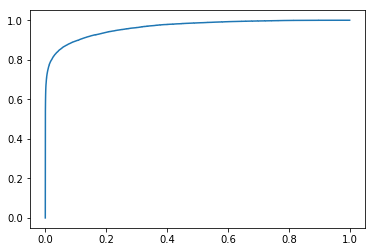

In [202]:
plt.plot(fpr, tpr)

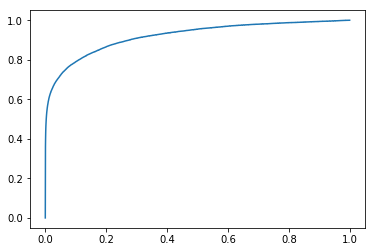

In [192]:
plt.plot(fpr2, tpr2)

In [203]:
auc(fpr, tpr)

0.9643391385375852

In [193]:
auc(fpr2, tpr2)


0.9197445595921253

In [71]:
test = pd.read_csv('test_transaction.csv')

In [72]:
test_id = pd.read_csv('test_identity.csv')

In [73]:
test = pd.merge(test, test_id, how='left', on='TransactionID')

In [237]:
#Dealing with NA
test.fillna(0, inplace=True)
#Variable Creation
test['has_r'] = (pd.notna(test['R_emaildomain'])).astype(int)
test['different_r'] = (test['has_r']) * (test.P_emaildomain == test.R_emaildomain).astype(int)
test['is_discover'] = (test.card4=='discover').astype(int)
test['is_credit'] = (test.card6=='credit').astype(int)
test['is_sketchy_addr2'] = (test.addr2.isin([0,60,96]))
test['is_na_M1'] = (test['M1']==0).astype(int)
test['is_na_M2'] = (test['M2']==0).astype(int)
test['is_na_M3'] = (test['M3']==0).astype(int)
test['is_na_M5'] = (test['M5']==0).astype(int)
test['is_na_M6'] = (test['M6']==0).astype(int)
test['is_na_M7'] = (test['M7']==0).astype(int)
test['is_na_M8'] = (test['M8']==0).astype(int)
test['is_na_M9'] = (test['M9']==0).astype(int)
test['is_big_NA'] = test['is_na_M1']*test['is_na_M2']*test['is_na_M3']*test['is_na_M5']*test['is_na_M6']*test['is_na_M7']*test['is_na_M8']*test['is_na_M9']
test['is_C'] = (test.ProductCD=='C').astype(int)
test['is_S'] = (test.ProductCD=='S').astype(int)
test['is_H'] = (test.ProductCD=='H').astype(int)
test['is_mobile'] = (test.DeviceType=='mobile').astype(int)
test['is_sketchy_device'] = (test.DeviceInfo.isin(sketchy_devices)).astype(int)
test['is_sketchy_browser'] = (test.id_31.isin(sketchy_browser)).astype(int)
test['is_protonmail'] = (test.P_emaildomain=='protonmail.com').astype(int)
test['is_elsewise_sketchy_email'] = (test.P_emaildomain.isin(['mail.com', 'outlook.es', 'aim.com', 'outlook.com']))
test['is_match'] = (test.id_34=='match_status:1').astype(int)
test['is_M4M2'] = (test['M4']=='M2').astype(int)
test['is_M3'] = (test['M3']=='T').astype(int)
test['is_M2'] = (test['M2']=='T').astype(int)
test['is_M9'] = (test['M9']=='T').astype(int)
test['is_no_info'] = (test.DeviceType==0).astype(int)
test['is_android']=(test['id_30'].apply(lambda x: str(x).split(' ')[0])=='Android').astype(int)
test['is_iOS']=(test['id_30'].apply(lambda x: str(x).split(' ')[0])=='iOS').astype(int)
test['is_other']=(test['id_30'].apply(lambda x: str(x).split(' ')[0])=='other').astype(int)
test['is_linux']=(test['id_30'].apply(lambda x: str(x).split(' ')[0])=='Linux').astype(int)
test['is_found'] = (test['id_29']=='Found').astype(int)
test['is_not_found'] = (test['id_29']=='NotFound').astype(int)
test['is_id38_T']= (test['id_38']=='T').astype(int)
test['is_id38_F']= (test['id_38']=='F').astype(int)
test['is_id37_T']= (test['id_37']=='T').astype(int)
test['is_id37_F']= (test['id_37']=='F').astype(int)
test['is_id36_T']= (test['id_36']=='T').astype(int)
test['is_id36_F']= (test['id_36']=='F').astype(int)
test['is_id35_T']= (test['id_35']=='T').astype(int)
test['is_id35_F']= (test['id_35']=='F').astype(int)
test['is_n_pixels'] = test.id_33.apply(lambda x: np.product(np.array(str(x).split('x')).astype(int)))
test['is_11'] = (test['id_32']==11)
test['is_15'] = (test['id_32']==15)
test['is_not_proxy'] = (test['id_23']==0).astype(int)
test['is_id27_found'] = (test['id_27']=='Found').astype(int)
test['is_id28_found'] = (test['id_28']=='Found').astype(int)
test['is_id28_new'] = (test['id_28']=='New').astype(int)
test['is_id12_found'] = (test['id_12']=='Found').astype(int)
test['is_id12_notfound'] = (test['id_12']=='NotFound').astype(int)
test['is_id15_found'] = (test['id_15']=='Found').astype(int)
test['is_id15_new'] = (test['id_15']=='New').astype(int)
test['is_id15_unknown'] = (test['id_15']=='Unknown').astype(int)
test['is_id16_found'] = (test['id_16']=='Found').astype(int)
test['is_id16_notfound'] = (test['id_16']=='NotFound').astype(int)
test['is_transaction_hr'] = test['TransactionDT'].apply(lambda x: ((x/60/60/24) - np.floor(x/60/60/24))*24)


In [204]:
test['preds4'] = xgb1.predict_proba(test[cols])[:, 1]

In [129]:
test_X = sc.transform(test[cols])

In [194]:
test['preds2'] = classifier.predict_proba(test_X)

In [76]:
submission_df = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds']})

In [77]:
submission_df.to_csv('submission_6.csv', index=False)

In [132]:
submission_df2 = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds2']})

In [136]:
submission_df2.to_csv('submission_NN.csv', index=False)

In [195]:
test['preds3'] = (test['preds']*2/3+test['preds2']*1/3)

In [205]:
test['preds5'] = (test['preds']*2/3+test['preds4']*1/3)

In [196]:
submission_df3 = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds3']})

In [197]:
submission_df3.to_csv('submission_ens_v3.csv', index=False)

In [ ]:
submission_df3.to_csv('submission_ens_v3.csv', index=False)

In [206]:
submission_df_DART = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds4']})


In [207]:
submission_df_DART.to_csv('submission_df_dart.csv', index=False)

In [208]:
submission_df_DART_ens = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds5']})

In [209]:
submission_df_DART_ens.to_csv('submission_df_dart_ens.csv', index=False)

In [210]:
test['preds6'] = (test['preds']*1/2+test['preds4']*1/2)

In [211]:
submission_df_DART_ensv2 = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds6']})


In [213]:
submission_df_DART_ensv2.to_csv('submission_df_dart_ens_v2.csv', index=False)

In [214]:
test['preds7'] = (test['preds']*1/3+test['preds4']*2/3)

In [215]:
submission_df_DART_ensv2 = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds7']})


In [216]:
submission_df_DART_ensv2.to_csv('submission_df_dart_ens_v3.csv', index=False)

In [238]:
test['preds_dart'] = xgb_dart.predict_proba(test[cols])[:, 1]
test['preds_other'] = xgb_other.predict_proba(test[cols])[:, 1]

In [239]:
test['preds_ens_1'] = (test['preds_dart']*1/3+test['preds_other']*2/3)

In [240]:
test['preds_ens_2'] = (test['preds_dart']*2/3+test['preds_other']*1/3)

In [241]:
test['preds_ens_3'] = (test['preds_dart']*1/2+test['preds_other']*1/2)

In [244]:
submission_DART_freal_1 = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds_ens_1']})

In [246]:
submission_DART_freal_2 = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds_ens_2']})


In [247]:
submission_DART_freal_3 = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds_ens_3']})


In [249]:
submission_DART_freal_1.to_csv('submission_dart_freal_1.csv', index=False)
submission_DART_freal_2.to_csv('submission_dart_freal_2.csv', index=False)
submission_DART_freal_3.to_csv('submission_dart_freal_3.csv', index=False)


In [250]:
submission_DART_only = pd.DataFrame({'TransactionID':test['TransactionID'], 'isFraud': test['preds_dart']})


In [251]:
submission_DART_only.to_csv('submission_dart_only.csv', index=False)